<a href="https://colab.research.google.com/github/ShubhamPoriya/100-days-of-code/blob/master/Building_first_classification_model_Dphi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


iris = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/iris.csv')

In [ ]:
print(iris.shape)
iris.head(5)

(150, 5)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [ ]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.groupby('variety').size()

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

In [ ]:
iris.groupby('variety').mean()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


In [ ]:
from sklearn.model_selection import train_test_split

iris_train, iris_test = train_test_split(iris, test_size=0.2)

print("Shape of original data:", iris.shape)
print("Shape of train data:", iris_train.shape)
print("Shape of test data:", iris_test.shape)
print()
iris_train.head(20)

Shape of original data: (150, 5)
Shape of train data: (120, 5)
Shape of test data: (30, 5)



,sepal.length,sepal.width,petal.length,petal.width,variety
140,6.7,3.1,5.6,2.4,Virginica
43,5.0,3.5,1.6,0.6,Setosa
147,6.5,3.0,5.2,2.0,Virginica
98,5.1,2.5,3.0,1.1,Versicolor
124,6.7,3.3,5.7,2.1,Virginica
63,6.1,2.9,4.7,1.4,Versicolor
33,5.5,4.2,1.4,0.2,Setosa
60,5.0,2.0,3.5,1.0,Versicolor
7,5.0,3.4,1.5,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa


In [ ]:
iris_train = iris_train.reset_index(drop=True)
iris_test = iris_test.reset_index(drop=True)

In [ ]:
iris_train.head(20)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,6.7,3.1,5.6,2.4,Virginica
1,5.0,3.5,1.6,0.6,Setosa
2,6.5,3.0,5.2,2.0,Virginica
3,5.1,2.5,3.0,1.1,Versicolor
4,6.7,3.3,5.7,2.1,Virginica
5,6.1,2.9,4.7,1.4,Versicolor
6,5.5,4.2,1.4,0.2,Setosa
7,5.0,2.0,3.5,1.0,Versicolor
8,5.0,3.4,1.5,0.2,Setosa
9,5.4,3.9,1.7,0.4,Setosa


Feature Selection method - Variance Threshold

Variance threshold method removes features whose variance is below a predefined cut-off value. 
*Drawback*: 

In [ ]:
iris_features = iris.drop('variety', axis=1)

In [ ]:
iris_features.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_features.shape

(150, 4)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

iris_variance = VarianceThreshold()

iris_variance.fit_transform(iris_features)

for feature in zip(iris_features.columns, iris_variance.variances_):
  print(feature)

('sepal.length', 0.6811222222222223)
('sepal.width', 0.1887128888888889)
('petal.length', 3.0955026666666665)
('petal.width', 0.5771328888888888)


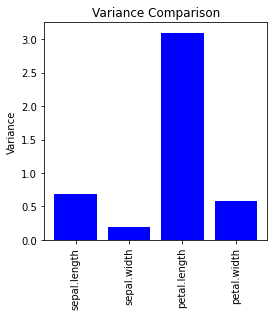

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(4,4))
plt.bar(x=iris_features.columns, height=iris_variance.variances_, color='blue')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title("Variance Comparison")

plt.show()

In [ ]:
selector = VarianceThreshold(threshold=0.2)

iris_features_new = selector.fit_transform(iris_features)

print("Number of features before VT: {}".format(iris_features.shape[1]))
print("Number of features after VT: {}".format(iris_features_new.shape[1]))

Number of features before VT: 4
Number of features after VT: 3


In [ ]:
iris_features = ['sepal.length', 'petal.length', 'petal.width']
iris_label = ['variety']

iris_train_features = iris_train[iris_features]
iris_train_label = iris_train[iris_label]
print("Train dataset split into features and labels (columns)")

iris_test_features = iris_test[iris_features]
iris_test_label = iris_test[iris_label]
print("Test dataset split into features and labels (columns)")

Train dataset split into features and labels (columns)
Test dataset split into features and labels (columns)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)

dt.fit(iris_train_features, iris_train_label)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predict_dt = dt.predict(iris_test_features)

iris_pred_label = pd.DataFrame(predict_dt.reshape(len(predict_dt), 1))
iris_pred_label.rename(columns={0:'dt_prediction'}, inplace=True)
iris_pred_label.head()

,dt_prediction
0,Virginica
1,Virginica
2,Setosa
3,Setosa
4,Virginica


In [ ]:
iris_test_pred = pd.concat([iris_test_label, iris_pred_label], axis=1)
iris_test_pred.head(7)

,variety,dt_prediction
0,Versicolor,Virginica
1,Virginica,Virginica
2,Setosa,Setosa
3,Setosa,Setosa
4,Virginica,Virginica
5,Versicolor,Versicolor
6,Virginica,Virginica


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

print("Accuracy is", accuracy_score(iris_test_label, iris_pred_label)*100)

Accuracy is 93.33333333333333


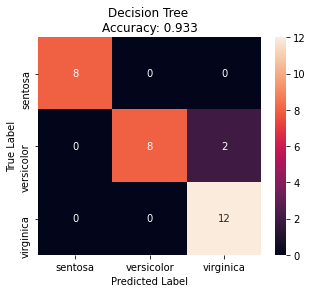

In [ ]:
import seaborn as sns

cm = metrics.confusion_matrix(iris_test_label, iris_pred_label)

cm_df = pd.DataFrame(cm,
                     index = ['sentosa', 'versicolor', 'virginica'],
                     columns = ['sentosa', 'versicolor', 'virginica'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title("Decision Tree \nAccuracy: {0:.3f}".format(accuracy_score(iris_test_label, iris_pred_label)))
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()